In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from autograd import grad,jacobian
from src.unconstrained_non_linear_optimization import (
    show_plot_contour,
    show_plot_3d,
    first_order_gradient_descent,
    second_order_gradient_descent,
    marquardt
)

## 1. Unconstrained Optimization

**Definition 1.1** Consider the problem:

\begin{align}
x^* = argmin_x f(x) \quad (1.1)
\end{align}

where $f$ is a continuously differentiable function and that a minimum $x^*$ exists between the interval $(a,b)$ to satisfy the condition $\triangledown f(x^*)=0$. In most cases, these problems are difficult to solve algebraically and must be processed using numerical estimation involving iterative algorithms that compute sequence of points:
\begin{align}
x_0, x_1, \cdots, x_n, \forall x \in \mathbb{R}^n
\end{align}
with:
\begin{align}
f(x_{k+1}) \lt f(x_k)
\end{align}

The algorithm follows one or more criteria such as $\triangledown f(x_k) \lt \epsilon$ where $\epsilon$ is the predefined convergence value. 


**Definition 1.2** ***Strong Minimum*** is $x^*$ along $(a,b)$ where the objective function increases locally in all directions. In other words, the point $x^*$ is a strong minimum of a function $f(x)$ if a scalar $\delta \gt 0$ exists such that $f(x^*) \lt f(x^* + \triangledown x)$ for all $\triangledown x$ such that $0 \lt \Vert{\triangledown x}\Vert \leq \delta$.

**Definition 1.3** ***Weak Minimum*** describes a point $x^*$ where the
$f(x)$ remains the same in some directions and increases locally in other directions. That is to say, a point $x^*$ is weak minimum of $f(x)$ if not strong minimum and scalar $\delta > 0$ exists such that $f(x^*) \leq f(x^* + \triangledown x)$ for all $\triangledown x$ such that $0 < \Vert\triangledown x\Vert \leq \delta$.

**Definition 1.4** The minimum is a unique global if $\delta=\infty$ otherwise, it is a local minimum.

### First Order Condition
If $f(x)$ has continuous second derivatives, it can be used to approximate nearby points using Taylor Series:

\begin{align}
\quad f(x + \triangledown x) \approx f(x) + \triangledown x^Tg(x) + \frac{1}{2}\triangledown x^TH(x)\triangledown x + \cdots \qquad (1.2)
\end{align}

where:\
$\quad x$: vector of scalars\
$\quad g$: gradient first derivative\
$\quad H$: hessian second derivative\
$\quad x=\left[\array{
        x_1&\\\vdots&\\x_2
    } \right]$\
$\quad g=\bigg(\frac{\partial f}{\partial x}\bigg)^T=\left[\array{\frac{\partial f}{\partial x}&\\\vdots&\\\frac{\partial f}{\partial x_n}} \right]$\
$\quad H=\left[\array{
 \frac{\partial^2f}{\partial x_1^2}&,\cdots&,\frac{\partial^2f}{\partial x_1\partial x_n}&\\
 \cdots&,\ddots&,\cdots&\\
 \frac{\partial^2f}{\partial x_1^2}&,\cdots&,\frac{\partial^2f}{\partial x_n^2}&\\
    }
    \right]$

***First-order condition*** From the first 2 terms of ***Eq.(1.2)***, (assume $\Vert\triangledown x\Vert \ll 1$)
 - Given of ambiguity of sign of the term $\triangledown x^T g(x)$, can only avoid cost decrese $f(x+\triangledown x) < f(x)$ if $g(x^*)=0$\
$\longrightarrow$ obtain further information from higher derivatives
 - $g(x^*)=0$ is a necessary and sufficient condition for a point to be a stationary point, a necessary but not sufficient condition to be a minima.
 - Stationary point can be a maximum o saddle point.
 
Additional conditions can be derived from the Taylor series expansion, we set $g(x^*)=0$, in which case:\
\begin{align}
f(x^* + \triangledown x) \approx f(x^*) + \frac{1}{2}\triangledown x^TH(x^*)\triangledown x + \cdots
\end{align}
 - For a strong Minimum, need $\triangledown x^T H(x^*)\triangledown x > 0 \quad \forall \triangledown x$\
 which is sufficient to ensure that $f(x^* + \triangledown x) > f(x^*)$
 - To be true for arbitrary $\triangledown x \ne 0$, sufficient condition is that $H(x^*) \gt 0$, positive definite.

***Second-order necessary condition*** for a strong minimum is $H(x^*) \geq 0 (PSD)$, because in this case the higher order terms in the expansion can play an important role, i.e:\
$\quad \triangledown x^TH(x^*)\triangledown x = 0$\
but the third term in Taylor expansion is positive.

Require $g(x^*)=0$ and $H(x^*) \gt 0$ (sufficient) or $H(x^*) \geq 0$ (necessary)

### Solution Methods
Minimization problems are solved using iterative algorithms given an initial estimate of the minimizer $x^*$ and a search direction $\delta$, hence we have the solution form as:

\begin{align}
x_{k+1} = x_k + \alpha_k\delta_k, \text{ for some scalar } \alpha_k \ne 0  
\end{align}

### Search Directon, $\delta$
Defines a slice through the solution space that specifically combines with the step size $\alpha$ to arrive at the proper minimizer $x^*$. This ensures that $f$ decreases moving from $x_k$ to $x_{k+1}$ and is usually relate to the gradien $\triangledown f(x_k)$. The most obvious direction is the $-\triangledown f_k$ since it will decrease $f_k$ most rapidly. This can be verified using Taylor's Theorem:

\begin{align}
f(x_k + \alpha) = f(x_k) + \alpha \delta^T \triangledown f(x_k) + \frac{1}{2}\alpha^2 \delta^T f(x_k+t\delta)\delta, \text{ where } t \in (0, \alpha)
\end{align}

The rate of change in $f$ along the direction of $\delta$ and $x_k$ is the coefficient $\alpha$.

Therefore, the unit direction \delta of most rapid decrease is the solution to:

$\min \delta^T\triangledown f_k$

$s.t. \Vert \delta \Vert = 1$

The default direction of the line search is:

$\delta = \frac{-\triangledown f_k}{\Vert \triangledown f_k \Vert}$

This must be orthogonal to the countours of the function f_k.


### Step Size, $\alpha$

The step size is a non-negative value such that $f(x_k + \alpha_k\delta_k) \lt f(x_k)$. When choosing step size using line-search, there is a tradeoff between substantial reduction of f_k and not spending too much time finding the solution. If $\alpha_k$ is too big, it is prone to overshoot while too small value will consume more time finding the convergent value.

A stable line search should be globally convergent, that is the gradient norms $\Vert \triangledown f(x_k) \Vert$ should converge to 0 with each iteration, in other words:

$\lim_{k\rightarrow \infty} \Vert\triangledown f(x_k) \Vert = 0$

$\underline{\overline{\text{Algorithm: Line Search}}}$\
$\text{Inputs:}\\
\begin{array}\\
\quad x_0& \text{initial value}\\
\quad \epsilon > 0& \text{convergence criteria}\\
\quad N& \text{maximum iteration}\\
\end{array}$\
$k\leftarrow 0$\
$\textbf{begin}$\
|$\quad \textbf{while } k \leq N \textbf{ do}$\
|$\quad$|$\quad\triangledown f(x_k) \leftarrow \frac{\partial f(x)}{\partial x}\big\vert_{x=x_k}$\
|$\quad$|$\quad \textbf{if } \triangledown f(x_k) \leq \epsilon \textbf{ do}$\
|$\quad$|$\quad$|$\quad \text{ break}$\
|$\quad$|$\quad \textbf{end if}$\
|$\quad$|$\quad \alpha_k \leftarrow \arg\min f(x_k - \alpha\triangledown f(x_k))$\
|$\quad$|$\quad x_{k+1} \leftarrow x_k - \alpha_k \triangledown f(x_k)$\
|$\quad$|$\quad k \leftarrow k + 1$\
|$\quad \textbf{end while}$\
$\textbf{return } \alpha_k, x_k, f(x_k)$\
$\textbf{end}$


**Example 1** Consider the function $\arg\min_{(x_1,x_1)}f(x)= \big[x_1 - x_2 + 2x_1x_2 + 2x_1^2 + x_2^2 \big]$,\
$\Box$ Find the minimizer $x^*$

***Solution***\
First iteration:

$\triangledown f(x)= \left[\begin{array}{c}
\frac{\partial f}{\partial x_1}&\\
\frac{\partial f}{\partial x_2}&
\end{array}\right]=\left[\begin{array}{c}
1 + 2x_2 + 4x_1&\\
-1 + 2x_1 + 2x_2&
\end{array}\right]$

Starting from $x_0=\left[\begin{array}{c}0&\\0&\end{array}\right]$ gives $-\triangledown f(x_0)=\left[\begin{array}{c}
1 + 2(0) + 4(0)&\\
-1 + 2(0) + 2(0)&
\end{array}\right]=\left[\begin{array}{c}-1&\\1& \end{array}\right]$

Then we have $f\big(x_0 - \alpha \triangledown f(x_0)\big) = f(-\alpha, \alpha)=a^2 - 2\alpha$

Taking partial derivative with respect to $\alpha$ ase set it to zero to find the minimizer $\alpha_0=1$.

Therefore $x_1=\left[\begin{array}{c}0&\\0& \end{array}\right] + \alpha_0 \left[\begin{array}{c}-1&\\1& \end{array}\right] = \left[\begin{array}{c}-1&\\1& \end{array}\right]$


Second iteration:

Given $x_1 = \left[\begin{array}{c}-1\\1\end{array}\right]$,
we have $-\triangledown f(x_1)= \left[\begin{array}{c}1\\1\end{array}\right]$

Then from $\underset{\alpha}{\arg\min}f\big(x_1 - \alpha\triangledown f(x_1)\big)=5\alpha^2 - 2\alpha -1$,
finding the minimizer $\alpha_1 = 0.2$

Hence, $x_2=\left[\begin{array}{c}-1\\1\end{array}\right] + \alpha \left[\begin{array}{c}1\\1\end{array}\right] = \left[\begin{array}{c}-0.8\\1.2\end{array}\right]$

## 1.3 First Order Line Search Gradient Descent

### Steepest Descent Algorithm
OPtimizations that use the gradient vector $\triangledown^T f(x)$ to compute the descent direction $p_k$ on each iteration are referred to as first order line search gradient descent methods and is also known as Cauchy Method introduced by Cauchy in 1847.

To select the  direction $p_k$ of the steepest descent algorithm, the direction given by the unit vector $p_k$ is chosen such that directional derivative $\triangledown^Tf(x_{k-1})p_k$ takes a minimum value for all possible valuied of $p_k$ at $x_{k-1}$. Now using Schwartz's inequality:

\begin{align}
\triangledown^Tf\big(x_{k-1}\big)p_k \geq -\Vert \triangledown^Tf\big(x_{k-1}\big) \Vert p_k \Vert \geq -\Vert \triangledown^Tf\big(x_{k-1}\big) \Vert
\end{align}

The expression $-\Vert \triangledown^Tf\big(x_{k-1}\big) \Vert$ is the minimum value, from the first and third term, we can write:

\begin{align}
p_k = -\frac{\triangledown f(x_{k-1})}{\Vert \triangledown f(x_{k-1})\Vert}
\end{align}

This expression is the normalized direction of the steepest descent algorithm presented as:

$\underline{\overline{\textbf{Algorithm: First Order Gradient Descent Method}}}$\
$\textbf{Inputs:}\\
\array{
f(x)&\text{objective function}\\
x_a&\text{initial values}\\
\epsilon_1& \text{minimum distance between x_j and x_j+1}\\
\epsilon_2& \text{minimum norm value for the gradient}\\
\epsilon_3& \text{distance between f(x) and f(x_next)}\\
\alpha_1& \text{parameter for Armijo condition rule}\\
\alpha_2& \text{parameter for curvature condition rule}\\
}$\
$gf \leftarrow f'(x)$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \delta_j \leftarrow - \frac{gf(x_j)}{\Vert gf(x_j) \Vert}$\
|$\quad \beta_j \leftarrow \text{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \lt \epsilon_1\text{ or } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$

**Example 1.3.1** Consider [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function) as the objective function:

$f(x1,x2) = (x1^2 + x2 - 11)^2 + (x1 + x2^2 -7)^2$

The function has 4 local minima:\
$\bf{f(3.0, 2.0)=0}$\
$f(-2.8051, 3.1313)=0$\
$f(-3.7792, -3.2831)=0$\
$f(3.5844, -1.8481)=0$

and 1 maximum:\
$f(-2.270845, -0.923039)=0$

$\Box$ Find one of the minimums with initial value of $[-2.5,-1]$

Number of steps: 12
x*=[3.00003242 2.00013692] f(x*)=0.000000


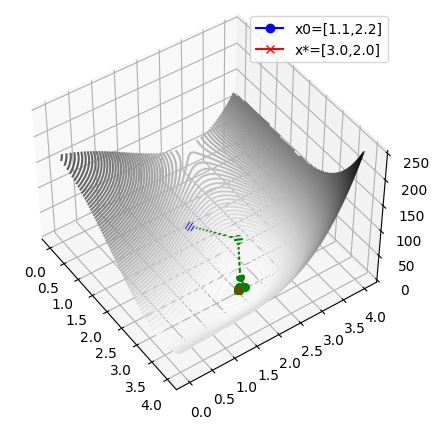

In [2]:
# Objective function
f = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Initial values of x^n
x_a = np.array([1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
alpha_1, alpha_2 = 10*-4, 0.9

# Run gradient descent
ret = first_order_gradient_descent(f, x_a, tol_1, tol_2, tol_3, alpha_1, alpha_2, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

#show_plot_contour(f, path, domain=[0,4], samples=100)

show_plot_3d(f, path, domain=[0,4], samples=100)

**Example 1.3.2** Consider $f(x_1,x_2)=x_1^2 + x_1x_2 + x_2^2$ and initial values of $x=\left[\array{-1.1\\2.2}\right]$, find $x^*$.

Number of steps: 11
x*=[ 0.00073645 -0.0010497 ] f(x*)=0.000001


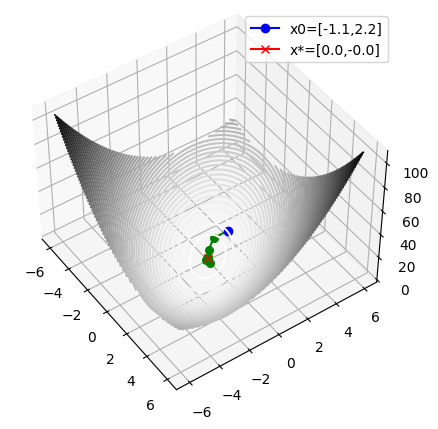

In [3]:
# Objective function
f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2

# Initial values of x^n
x_a = np.array([-1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
#alpha_1, alpha_2 = 10*-4, 0.212
alpha_1, alpha_2 = 10*-4, 0.9

# Run gradient descent
ret = first_order_gradient_descent(f, x_a, tol_1, tol_2, tol_3, alpha_1, alpha_2, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

# Show the steepest descent path on a 2d plane
#show_plot_contour(f, path)

# Show the steepest descent path along the curve surface
show_plot_3d(f, path)

## 1.4 Second Order Line Search Gradient Descent
The Hessian of the objective function having the form $\mathbb{H}f(x)$ will be used to compute the line search.

\begin{align}
\delta = -[\mathbb{H}f]^{-1}(x) \triangledown f(x) \qquad (1.4.1)
\end{align}

So far the above equation is for single variable non-linear objective function, for multivariate we refer to:

\begin{align}
x_j = x_{j-1} - [\mathbb{H}f]^{-1}(x_{j-1})\triangledown f(x_{j-1}), \quad j=1,2,3,\cdots \qquad (1.4.2)
\end{align}

This is used for solving the problem $\triangledown f(x)=0$ iteratively, given the starting value $x_0$. The Newton's method follows quadratic convergence, but is not always guaranteed even from an iterate close to the minimizer, since the ***Hessian*** given by $\mathbb{H}f(x)$ may not always be positive definite. To overcome this problem, the search given by Eq.(1.4.1) is instead used as a descent direction if the ***line search descent direction***. Thus, for the $j^{th}$ step, the descent direction is given by:

\begin{align}
\delta_j = -[\mathbb{H}f]^{-1}(x_{j-1}) \triangledown f(x_{j-1}) \qquad (1.4.3)
\end{align}

Finally, the step length $\beta_j$ is selected after solving the one dimensional optimization task given by

\begin{align}
\min_{\beta_j \gt 0} f(\beta_j) = min_{\beta_j>0} f(x_{j-1} + \beta_j\delta_j)
\end{align}

The algorithm describing the modified version  of Newton's Method is shown as:

$\underline{\overline{\textbf{Algorithm: Second Order Line Search Modified Newton's Method}}}$\
$\textbf{Inputs:}\\
\array{
f(x) &\text{objective function}\\
x_a &\text{initial values}\\
\epsilon_1 &\text{minimum distance between x_j and x_j+1}\\
\epsilon_2 &\text{minimum norm value for the gradient}\\
\epsilon_3 &\text{distance between f(x) and f(x_next)}\\
\alpha_1 &\text{parameter for Armijo condition rule}\\
\alpha_2 &\text{parameter for curvature condition rule}\\
}$\
$g \leftarrow f'(x)$\
$\mathbb{H} \leftarrow \mathbb{H}f(x)$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \delta_j \leftarrow - [\mathbb{H}f]^{-1}(x_j)\triangledown f(x_j)$\
|$\quad \beta_j \leftarrow \text{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \text{ and } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$
 

**Example 1.4.1** Consider the Beale's function which is multimodal with sharp peaks at the corners of the input domain of [-4.5, 4.5]

$f(x_1,x_2)=(1.5 - x_1(1-x_2))^2 + (2.25 - x_1(1-x_2^2))^2 + (2.625-x_1(1-x_2^3))^2 $\

The function has one global minimizer at $f(3, 0.5)=0$.

Use the following constants:\
$\Box$ Initial values at $x_j=\left[\array{1.8\\0.8}\right]$ and use the Modified Newton's Method to find the expected minimizer.\
$\Box$ $\epsilon_1=\epsilon_2=\epsilon_3=10^{-5}$\
$\Box$ Constants for the step length using strong Wolfe conditions to be $\alpha_1=10^{-4}$ and $\alpha_2=0.25$

Number of steps: 11
x*=[2.99987271 0.49997574] f(x*)=0.000000


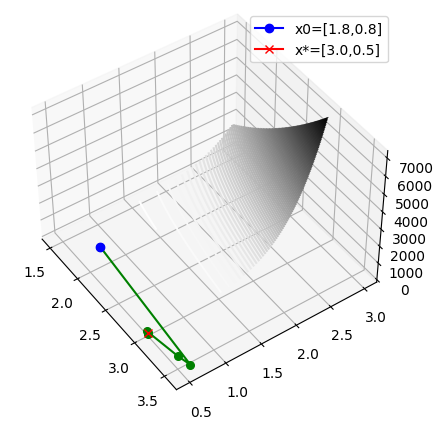

In [4]:
f = lambda x: (1.5 - x[0]*(1 - x[1]))**2 + (2.25 - x[0]*(1 - x[1]**2))**2 + (2.625 - x[0]*(1 - x[1]**3))**2
#f = lambda x: (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
eps_1 = 10**-5
eps_2 = 10**-5
eps_3 = 10**-5
alpha_1 = 10**-4
alpha_2 = 0.9
x_a = np.array([1.8, 0.8], dtype=float)
ret = second_order_gradient_descent(
    f=f, x_a=x_a, eps_1=eps_1, eps_2=eps_2, eps_3=eps_3,
    alpha_1=alpha_1, alpha_2=alpha_2, verbose=False
)
print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

# Get gradient descent path
path = np.array(ret[2])
# Show the steepest descent path on a 2d plane
#show_plot_contour(f, path)
# Show the steepest descent path along the curve surface
show_plot_3d(f, path, domain=[1.5,3])

## 1.5 Marquardt Method
This method is a combination of the steepest descent and Newton's Method in which the diagonal elements of the Hessian Matrix is midified on each step:

\begin{align}
[\mathbb{H}f(x_j)]' = [\mathbb{H}f(x_j)] + \gamma\mathbb{I}
\end{align}

where $\gamma$ is a sufficiently large positive constant that guarantees the positive definiteness of $[\mathbb{H}f(x_j)]'$ when $[\mathbb{H}f(x_j)]$ is not, and $\mathbb{I}$ is the identity matrix.

The descent direction is determined by:

\begin{align}
\delta_j = -[\mathbb{H}f(x_j)]'\triangledown f(x_j)
\end{align}



$\underline{\overline{\textbf{Algorithm: Marquadt Method}}}$\
$\textbf{Inputs:}\\
\array{
f(x) &\text{objective function}\\
x_a &\text{initial values}\\
\epsilon_1 &\text{minimum distance between x_j and x_j+1}\\
\epsilon_2 &\text{minimum norm value for the gradient}\\
\epsilon_3 &\text{distance between f(x) and f(x_next)}\\
\alpha_1 &\text{parameter for Armijo condition rule}\\
\alpha_2 &\text{parameter for curvature condition rule}\\
\gamma &\text{factor to guarantee positive definite}\\
}$\
$x_j \leftarrow x_a$\
$\textbf{while True do}$\
|$\quad \mathbb{H}' \leftarrow \mathbb{H}f(x_j)+\gamma\mathbb{I}$\
|$\quad \delta_j \leftarrow - [\mathbb{H}f]'^{-1}(x_j)\triangledown f(x_j)$\
|$\quad \textit{Solve for the descent direction}$\
|$\quad \beta_j \leftarrow \text{line_search}(\cdots)$\
|$\quad x_{j+1} \leftarrow x_j + \beta_j\delta_j$\
|$\quad\textbf{if } \Vert x_{j+1}-x_j\Vert \text{ and } \Vert g(x)\Vert \lt \epsilon_2 \text{ or } |f(x)-f(x)| \lt \epsilon_3 \textbf{ do}$\
|$\quad$|$\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$|$\quad$ $\textbf{ break}$\
|$\quad \textbf{ else}$\
|$\quad$|$\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad \textbf{ end if}$\
$\textbf{end while}$\
$\textbf{return }$ $x^*, f(x^*)$

**Example 1.5.1** Consider again the [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function) as the objective function:

$f(x1,x2) = (x1^2 + x2 - 11)^2 + (x1 + x2^2 -7)^2$

The function has 4 local minima:\
$\bf{f(3.0, 2.0)=0}$\
$f(-2.8051, 3.1313)=0$\
$f(-3.7792, -3.2831)=0$\
$f(3.5844, -1.8481)=0$

and 1 maximum:\
$f(-2.270845, -0.923039)=0$

$\Box$ Find one of the minimums with initial value of $[-2.5,-1]$

Number of steps: 51
x*=[0, 0] f(x*)=170.000000


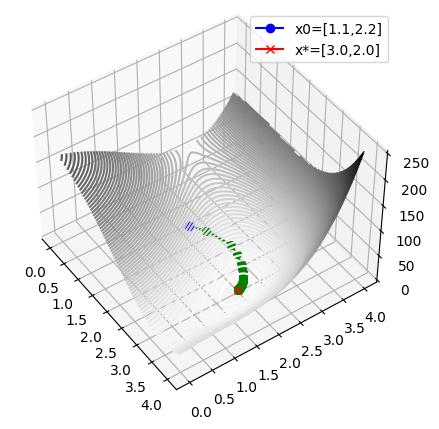

In [6]:
# Objective function
f = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Initial values of x^n
x_a = np.array([1.1, 2.2])

# Gradient descent stop parameter
tol_1, tol_2, tol_3 = 10**-5, 10**-5, 10**-5
alpha_1, alpha_2 = 10*-4, 0.9

gamma = 10**3

# Run gradient descent
ret = marquardt(f, x_a, tol_1, tol_2, tol_3, alpha_1, alpha_2, gamma=gamma, verbose=False)

# Get gradient descent path
path = np.array(ret[2])

print(f"Number of steps: {len(path)}")
print(f"x*={ret[0]} f(x*)={ret[1]:.6f}")

#show_plot_contour(f, path, domain=[0,4], samples=100)

show_plot_3d(f, path, domain=[0,4], samples=100)

#### Reference
[1] [Engineering Optimization: Theory and Practice, 2009, S. Rao](https://www.amazon.com/Engineering-Optimization-Practice-Singiresu-Rao/dp/0470183527)

[2] [Wolfe Conditions, wikipedia](https://en.wikipedia.org/wiki/Wolfe_conditions)

[3] [Line Search Method, wikipedia](https://optimization.cbe.cornell.edu/index.php?title=Line_search_methods)